# Utility Functions Examples

**Author:** Luis Paulo Vinatea Barberena  
**Date:** May 21, 2025

This notebook demonstrates how to use the utility functions in `src/utils/` to streamline your data analysis workflows.

## Setup

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import utility functions
import sys

sys.path.append("..")
from src.utils.data_processing import (
    clean_missing_values,
    detect_outliers,
    encode_categorical,
)
from src.utils.visualization import (
    plot_correlation_matrix,
    plot_distribution,
    plot_missing_values,
)
from src.utils.notebook_utils import create_notebook_template

# For visualization
%matplotlib inline
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# For reproducibility
np.random.seed(42)

## 1. Creating Sample Data

Let's create some sample data to demonstrate the utility functions.

In [3]:
# Create a sample dataset
n_samples = 1000
data = {
    "numeric_1": np.random.normal(0, 1, n_samples),
    "numeric_2": np.random.normal(5, 2, n_samples),
    "numeric_3": np.random.exponential(2, n_samples),
    "category_1": np.random.choice(
        ["A", "B", "C", "D"], n_samples, p=[0.4, 0.3, 0.2, 0.1]
    ),
    "category_2": np.random.choice(
        ["X", "Y", "Z"], n_samples, p=[0.6, 0.3, 0.1]
    ),
    "date": pd.date_range(start="2024-01-01", periods=n_samples),
}

# Create DataFrame
df = pd.DataFrame(data)

# Add some correlations
df["numeric_4"] = (
    df["numeric_1"] * 2 + df["numeric_2"] + np.random.normal(0, 0.5, n_samples)
)

# Add some missing values
for col in df.columns[:4]:  # Skip date column
    mask = np.random.random(n_samples) < 0.1  # 10% missing values
    df.loc[mask, col] = np.nan

# Add some outliers
for col in ["numeric_1", "numeric_2", "numeric_3"]:
    outlier_idx = np.random.choice(n_samples, 5, replace=False)
    df.loc[outlier_idx, col] = np.random.uniform(10, 20, 5)

# Display the first few rows
df.head()

,numeric_1,numeric_2,numeric_3,category_1,category_2,date,numeric_4
0,0.496714,7.798711,1.045481,A,Y,2024-01-01,8.488403
1,NaN,6.849267,0.136579,B,Y,2024-01-02,6.370558
2,0.647689,5.119261,0.857940,C,Z,2024-01-03,6.071498
3,1.523030,3.706126,0.235312,A,X,2024-01-04,6.035851
4,-0.234153,6.396447,3.302971,B,X,2024-01-05,6.001058


## 2. Data Processing Utilities

Let's demonstrate the data processing utilities.

### 2.1 Handling Missing Values

In [4]:
# First, let's check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Clean missing values using different strategies
print("\nCleaning with different strategies:")
strategies = ["drop", "mean", "median", "fill"]
for strategy in strategies:
    kwargs = {"fill_value": 0} if strategy == "fill" else {}
    df_cleaned = clean_missing_values(df, strategy=strategy, **kwargs)
    print(f"\nStrategy: {strategy}")
    print(f"Original shape: {df.shape}, Cleaned shape: {df_cleaned.shape}")
    print(f"Missing values after cleaning: {df_cleaned.isnull().sum().sum()}")

Missing values in the dataset:
numeric_1     109
numeric_2      95
numeric_3      92
category_1     99
category_2      0
date            0
numeric_4       0
dtype: int64

Cleaning with different strategies:

Strategy: drop
Original shape: (1000, 7), Cleaned shape: (657, 7)
Missing values after cleaning: 0

Strategy: mean
Original shape: (1000, 7), Cleaned shape: (1000, 7)
Missing values after cleaning: 99

Strategy: median
Original shape: (1000, 7), Cleaned shape: (1000, 7)
Missing values after cleaning: 99

Strategy: fill
Original shape: (1000, 7), Cleaned shape: (1000, 7)
Missing values after cleaning: 0


### 2.2 Detecting Outliers

Outliers detected using IQR method:
numeric_1: 14 outliers (1.40%)
numeric_2: 12 outliers (1.20%)
numeric_3: 48 outliers (4.80%)
numeric_4: 11 outliers (1.10%)

Outliers detected using Z-score method:
numeric_1: 5 outliers (0.50%)
numeric_2: 4 outliers (0.40%)
numeric_3: 13 outliers (1.30%)
numeric_4: 2 outliers (0.20%)


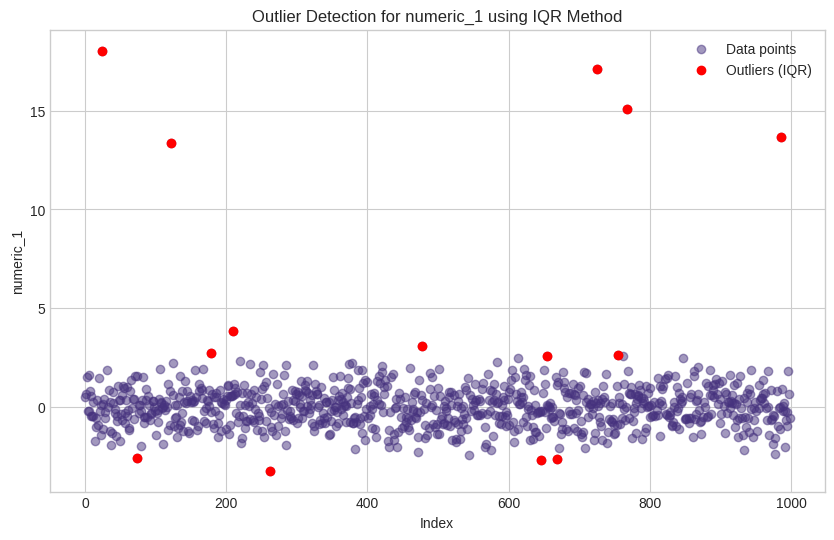

In [5]:
# Detect outliers using different methods
numeric_cols = ["numeric_1", "numeric_2", "numeric_3", "numeric_4"]

# Using IQR method
outliers_iqr = detect_outliers(df, method="iqr", columns=numeric_cols)
print("Outliers detected using IQR method:")
for col in numeric_cols:
    n_outliers = outliers_iqr[col].sum()
    print(f"{col}: {n_outliers} outliers ({n_outliers / len(df) * 100:.2f}%)")

# Using Z-score method
outliers_zscore = detect_outliers(
    df, method="zscore", columns=numeric_cols, threshold=3.0
)
print("\nOutliers detected using Z-score method:")
for col in numeric_cols:
    n_outliers = outliers_zscore[col].sum()
    print(f"{col}: {n_outliers} outliers ({n_outliers / len(df) * 100:.2f}%)")

# Visualize one column with outliers
col = "numeric_1"
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df[col], alpha=0.5, label="Data points")
plt.scatter(
    df.index[outliers_iqr[col]],
    df.loc[outliers_iqr[col], col],
    color="red",
    label="Outliers (IQR)",
)
plt.title(f"Outlier Detection for {col} using IQR Method")
plt.xlabel("Index")
plt.ylabel(col)
plt.legend()
plt.show()

### 2.3 Encoding Categorical Variables

In [ ]:
# Encode categorical variables using different methods
categorical_cols = ["category_1", "category_2"]

# One-hot encoding
df_onehot = encode_categorical(df, columns=categorical_cols, method="onehot")
print("One-hot encoded:")
print(df_onehot.head())
print(f"Original columns: {df.columns.tolist()}")
print(f"Encoded columns: {df_onehot.columns.tolist()}")

# Label encoding
df_label = encode_categorical(df, columns=categorical_cols, method="label")
print("\nLabel encoded:")
print(df_label.head())

# Compare original and encoded dataframes
for col in categorical_cols:
    # Handle non-NaN values
    non_nan_mask = ~df[col].isna()
    unique_vals = df.loc[non_nan_mask, col].unique()
    encoded_vals = df_label.loc[non_nan_mask, col].unique()
    print(f"\n{col} mapping:")
    for orig, enc in zip(sorted(unique_vals), sorted(encoded_vals)):
        print(f"  {orig} -> {enc}")

    # Handle NaN values separately if they exist
    if df[col].isna().any():
        nan_encoded = df_label.loc[df[col].isna(), col].unique()
        if len(nan_encoded) > 0:
            print(f"  NaN -> {nan_encoded[0]}")

One-hot encoded:
   numeric_1  numeric_2  numeric_3       date  numeric_4  category_1_A  \
0   0.496714   7.798711   1.045481 2024-01-01   8.488403          True   
1        NaN   6.849267   0.136579 2024-01-02   6.370558         False   
2   0.647689   5.119261   0.857940 2024-01-03   6.071498         False   
3   1.523030   3.706126   0.235312 2024-01-04   6.035851          True   
4  -0.234153   6.396447   3.302971 2024-01-05   6.001058         False   

   category_1_B  category_1_C  category_1_D  category_2_X  category_2_Y  \
0         False         False         False         False          True   
1          True         False         False         False          True   
2         False          True         False         False         False   
3         False         False         False          True         False   
4          True         False         False          True         False   

   category_2_Z  
0         False  
1         False  
2          True  
3         False

## 3. Visualization Utilities

Let's demonstrate the visualization utilities.

### 3.1 Correlation Matrix

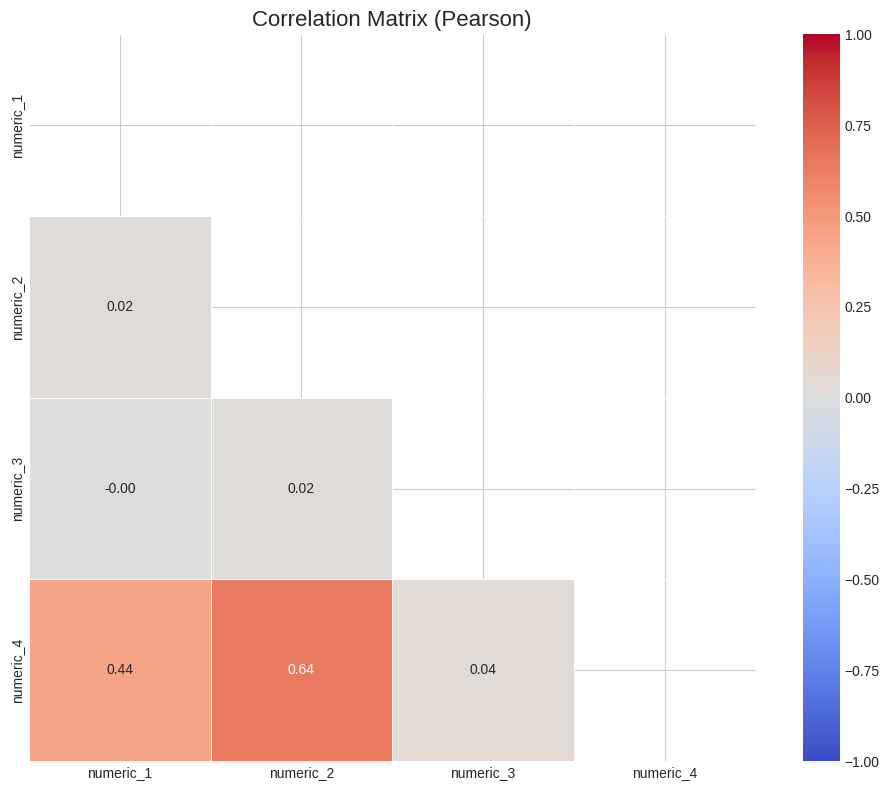

In [8]:
# Clean the data first (use median strategy to preserve relationships)
df_clean = clean_missing_values(df, strategy="median")

# Plot correlation matrix
plot_correlation_matrix(
    df_clean[numeric_cols],
    figsize=(10, 8),
    method="pearson",
    cmap="coolwarm",
    mask_upper=True,
    annotate=True,
)

### 3.2 Distribution Plots

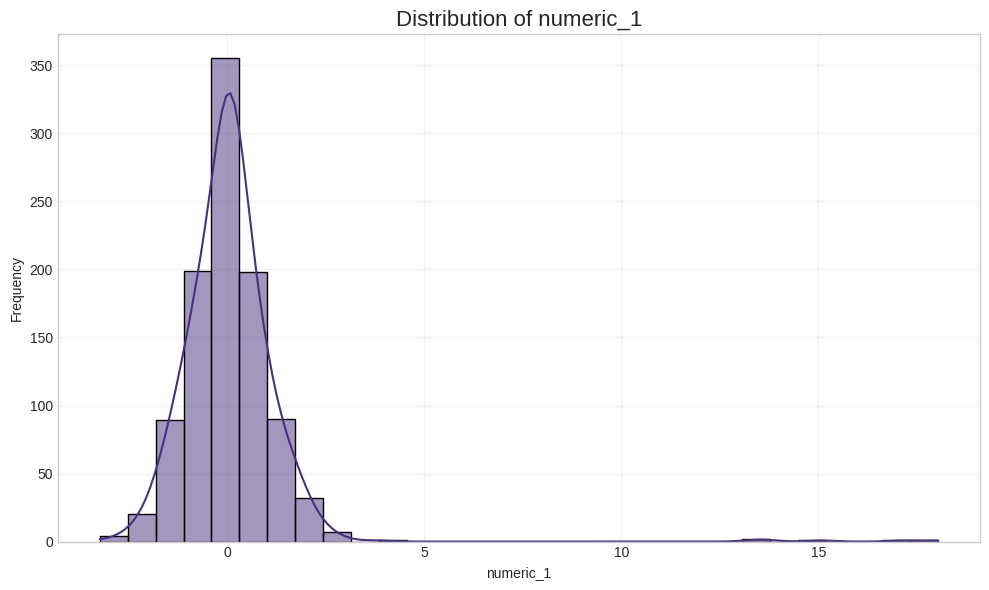

Descriptive Statistics for numeric_1:
count    1000.000000
mean        0.078292
std         1.431163
min        -3.241267
25%        -0.564633
50%         0.024510
75%         0.561331
max        18.040228
Name: numeric_1, dtype: float64
Skewness: 6.4463
Kurtosis: 70.3235


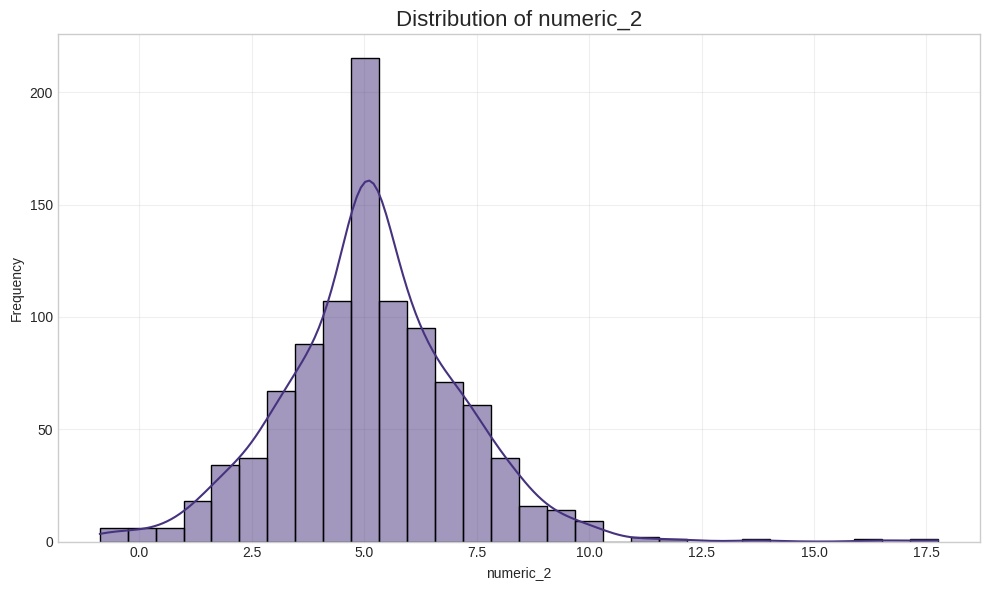

Descriptive Statistics for numeric_2:
count    1000.000000
mean        5.174670
std         2.011736
min        -0.880777
25%         4.030216
50%         5.128949
75%         6.280703
max        17.760222
Name: numeric_2, dtype: float64
Skewness: 0.4333
Kurtosis: 2.8142


In [9]:
# Plot distribution of a numeric column
for col in numeric_cols[:2]:  # Plot first two numeric columns
    plot_distribution(df_clean, column=col, bins=30, kde=True, figsize=(10, 6))

### 3.3 Missing Value Visualization

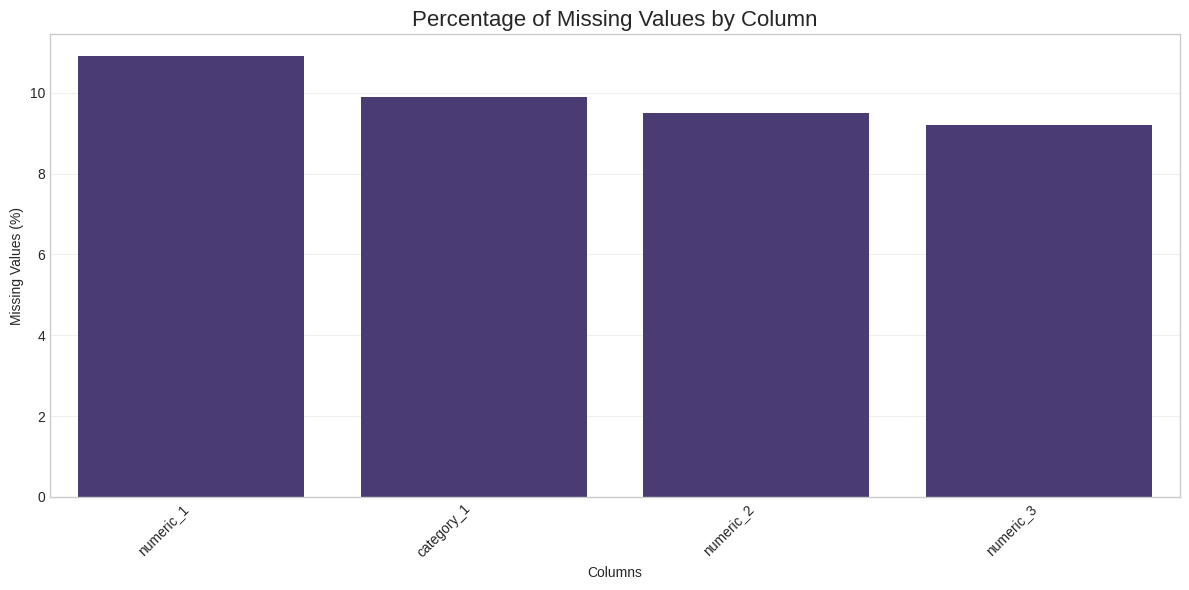

Missing Values Summary:
       Column  Missing Values (%)  Missing Count
0   numeric_1                10.9            109
1  category_1                 9.9             99
2   numeric_2                 9.5             95
3   numeric_3                 9.2             92


In [10]:
# Plot missing values in the original dataframe
plot_missing_values(df, figsize=(12, 6))

## 4. Notebook Generation Utility

Let's demonstrate how to create a new notebook template using the utility function.

In [11]:
# Create a new notebook template
output_path = "../notebooks/new_analysis_demo.ipynb"
create_notebook_template(
    output_path=output_path,
    title="Customer Segmentation Analysis",
    author="Luis Paulo Vinatea Barberena",
)

print(f"A new notebook template has been created at {output_path}")
print(
    "You can use this utility to quickly create standardized notebook templates."
)

Notebook template created successfully at ../notebooks/new_analysis_demo.ipynb
A new notebook template has been created at ../notebooks/new_analysis_demo.ipynb
You can use this utility to quickly create standardized notebook templates.


## 5. Conclusion

This notebook demonstrated how to use the utility functions from `src/utils/` to streamline your data analysis workflows:

1. **Data Processing Utilities**:
   - Handling missing values with different strategies
   - Detecting and visualizing outliers
   - Encoding categorical variables

2. **Visualization Utilities**:
   - Creating correlation matrices
   - Plotting distributions
   - Visualizing missing values

3. **Notebook Generation Utility**:
   - Creating standardized notebook templates

These utilities help maintain consistency across analyses and save time by eliminating the need to rewrite common code.